# 5.1 ~ 3 정적 시각화
## 데이터 시각화
직관적으로 정보를 확인하는 효과적인 방법 => 적절한 **그래프 유형 선택**과 **옵션 활용**이 중요

## 그래프 구성 요소
그래프를 구성하는 요소와 방식을 안다면 다양한 활용 가능
- figure : 도화지(그림 전체)
- axes : 도화지 내 plot이 그려지는 공간
- axis : plot의 축 -> y축, x축

## 파이썬 시각화 라이브러리
대표적으로 Matplotlib과 Seaborn을 많이 사용함
|Matplotlib||Seaborn|
|---|:---:|---|
|파이썬의 기본적인 시각화 라이브러리|기능|통계 시각화에 특화|
|기본적이고 단순한 디스플레이|디스플레이|다채로운 시각화 가능|
|한 줄의 코드로 복잡한 그래프 구현이 어려움|복잡도|쉽고 간단하게 복잡한 기능 구현|
|여러 개의 시각화 가능|다중성|다중 시각화 어려움(메모리 부족 이슈)|
|유연한 인터페이스 제공<br>(즉, 원하는 기능 구현 용이)|유연성|유연성이 상대적으로 떨어짐|

# 정적 시각화
## Matplotlib
파이썬의 가장 인기 있는 **데이터 시각화** 라이브러리로, **2D 형태의 그래프**와 **이미지**를 그릴 때 많이 사용  
=> **pyplot** 모듈을 많이 사용, 주로 **plt**라는 별칭 이용하여 호출
> `import matplotlib.pyplot as plt`

### Matplotlib의 특징
유연한 인터페이스
### Matplotlib 그래프 그리기
1. `plt.figure()` : 새로운 그래프를 담을 도화지(figure) 생성
2. `plt.plot()` : 데이터 시각화 기능 담당, 그래프 유형(plot, hist, pie 등) 과 변수를 주어 설정 가능
3. `plt.show()` : 그래프 출력
### Matplotlib 그래프 구성 요소
pyplot을 이용하면 figure, axes, axis를 쉽게 조작 가능
### 여러 개의 그래프 그리기
여러 개의 그래프를 하나의 figure에 담는다면 한번에 더 많은 정보를 효과적으로 전달할 수 있음  
=> `subplot`과 `subplots` 커맨드를 활용하여 여러 그래프 구현 가능
#### `subplot`
`plt.subplot(row, column, index)`
#### `subplots`
`axes` 객체의 `twinx` 메소드를 이용하면 x축을 공유하는 두 개의 그래프를 동시에 그릴 수 있음

## Seaborn
Maptplotlib을 기반으로 하며 **다채로운 디자인 테마**와 **통계용 차트** 등이 추가된 강력한 시각화 라이브러리  
=> 한 줄의 코드로 강력한 시각화 가능
> `import seaborn as sns`
### Seaborn 특징
1. 간결한 한 줄 코드로 수비고 간단하게 복잡한 기능 구현
    - 하지만, 변수가 추가될수록 메모리 부족 이슈 & 가독성 떨어짐
2. 통계 시각화에 특화
    - 간단한 명령어로 범주별 산점도 구현
    - `statsmodels`의 통계 기능 활용으로 추세선 출력
    - 이외에도 `jointplot`을 포함한 여러 플롯 메소드에서 `statsmodels`를 이용한 데이터 분포 시각화를 함
3. 데이터에 적합한 **다채로운 시각화 기능**을 제공
### Seaborn 그래프 그리기
```python
import seaborn as sns

sns.scatterplot(x='변수명', y='변수명', hue='범주형 변수명', data=데이터이름)
```

# 실습
## Matplotlib

### 산점도 + 추세선 : `regplot`

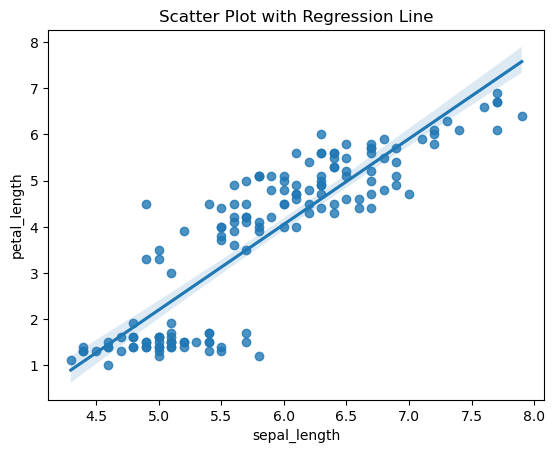

In [25]:
sns.regplot(x='sepal_length', y='petal_length', data=df)
plt.title('Scatter Plot with Regression Line')
plt.show()

#### 신뢰구간 제거 : `ci` 인수

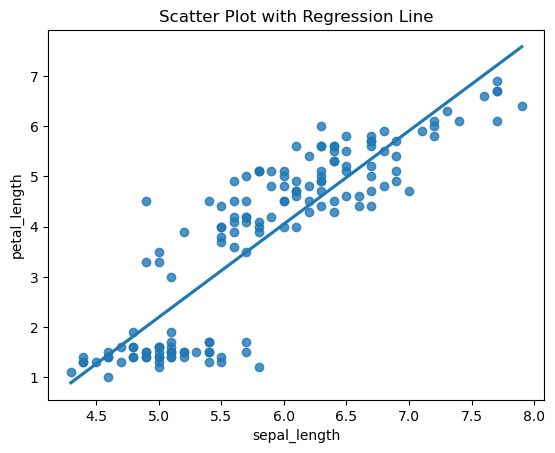

In [26]:
sns.regplot(x='sepal_length', y='petal_length', ci=None, data=df)
plt.title('Scatter Plot with Regression Line')
plt.show()

In [27]:
sns.regplot(x='sepal_length', y='petal_length',hue='species', ci=None, data=df)
plt.title('Scatter Plot with Regression Line')
plt.show()

TypeError: regplot() got an unexpected keyword argument 'hue'

### 범주별 산점도 + 추세선 : `lmplot`

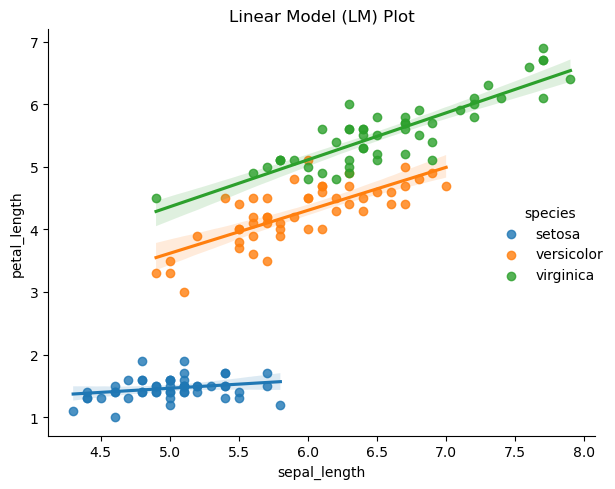

In [28]:
sns.lmplot(x='sepal_length', y='petal_length',hue='species', data=df)
plt.title('Linear Model (LM) Plot')
plt.tight_layout()
plt.show()

### 점도표 : `rugplot`

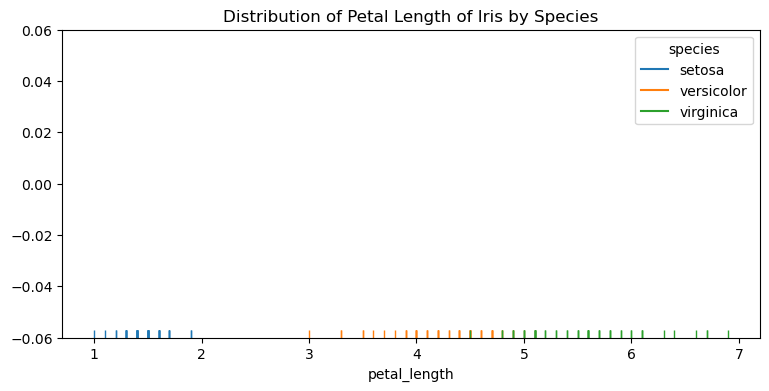

In [29]:
plt.figure(figsize=(9, 4))
sns.rugplot(x='petal_length', hue='species', data=df)
plt.title('Distribution of Petal Length of Iris by Species')
plt.show()

### 단변량 & 다변량 시각화 : `pairplot`

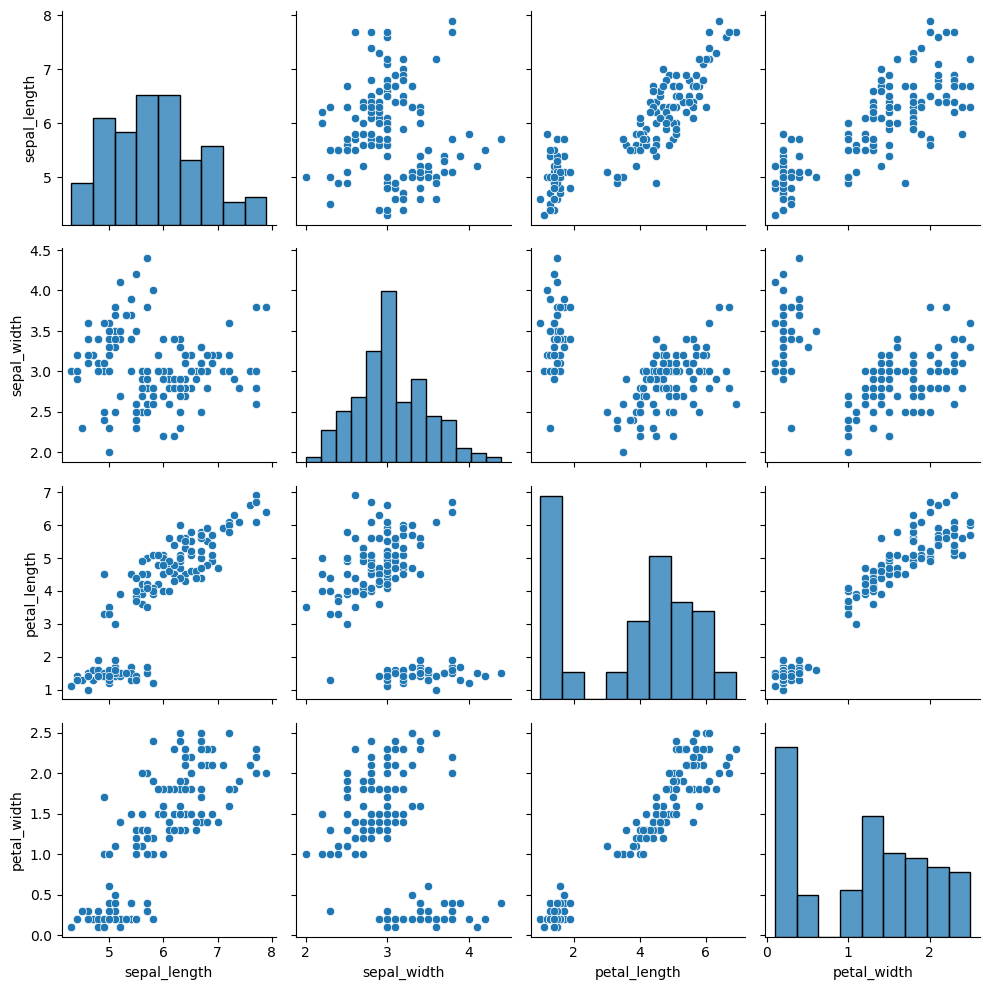

In [30]:
sns.pairplot(df)
plt.tight_layout()
plt.show()

#### 범주별 `pairplot` : `hue` 옵션

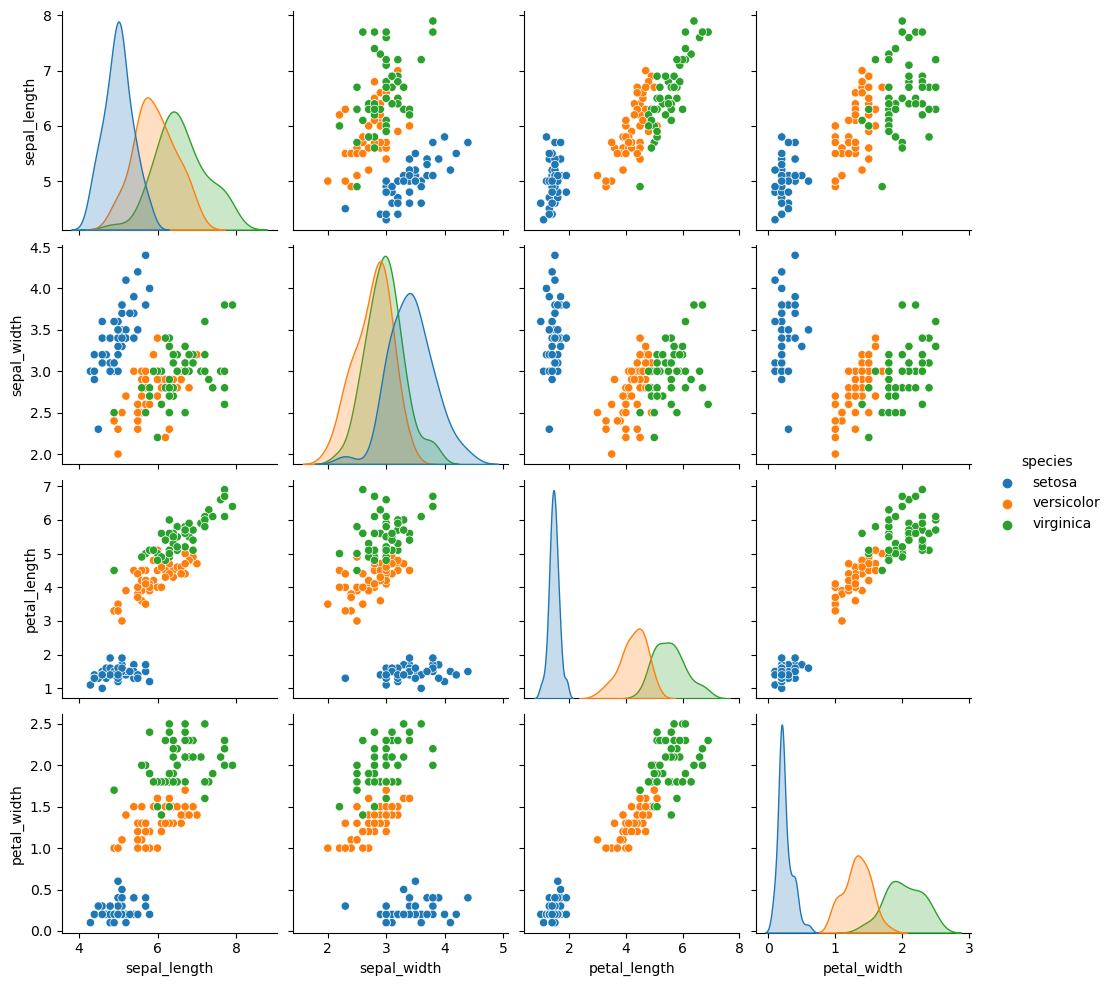

In [31]:
sns.pairplot(df, hue='species')
plt.show()

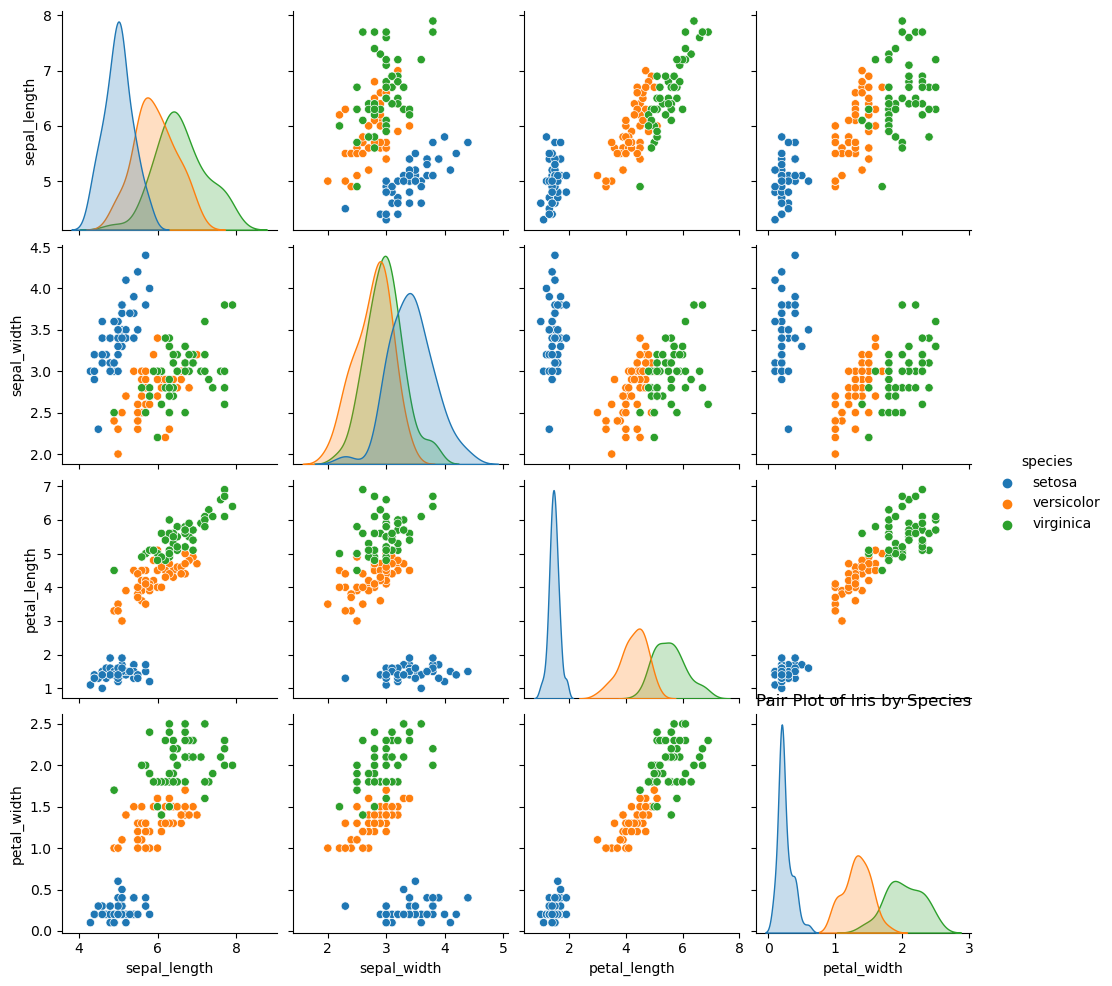

In [32]:
sns.pairplot(df, hue='species')
plt.title('Pair Plot of Iris by Species') # 이상한 곳에 title이 생성 됨
plt.show()

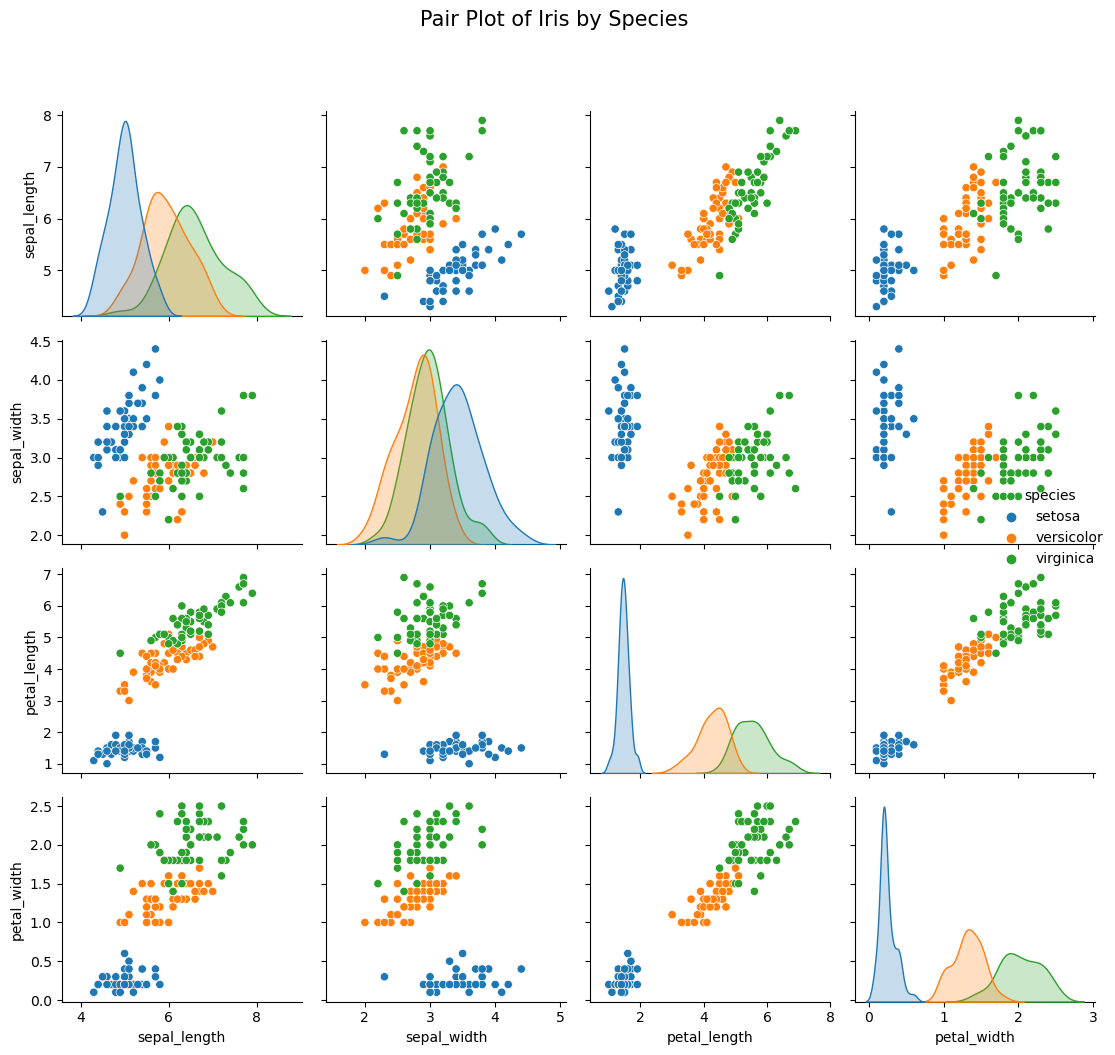

In [34]:
# 정상적으로 title 생성 방법
# 1. pairplot을 plot 이라는 변수에 할당
plot = sns.pairplot(df, hue='species')

# 2. fig.suptitle 기능 활용
plot.fig.suptitle('Pair Plot of Iris by Species', y=1.05, fontsize=15)
plt.tight_layout()
plt.show()

`pairplot`은 강력한 기능이긴 하지만, 모든 상황에서 사용할 수 있는 것은 아님  
실수형 변수가 더 많은 경우라면(e.g. 10개, 20개, 100개, ...), `figure`에 모든 정보를 담기 힘들며, 연산 시간이 오래 걸릴 것.  
결국 가독성이 떨어지는 그래프가 나오거나, 알아보기 불가능한 그래프, 또는 메모리 부족과 같은 문제가 생기게 됨  
### `seaborn`의 `heatmap`
example data 필요

In [ ]:
car_rentals = pd.read_csv('./data/car_rentals.csv')
display(car_rentals)

#### 피봇 테이블 생성 : `pivot_table`

In [ ]:
rental_pivot = pd.pivot_table(car_rentals, index='month', columns='year', values='rentals')
display(rental_pivot)

In [ ]:
plt.figure(figsize=(8, 4))
sns.heatmap(rental_pivot)
plt.title('Heatmap of Number of Car Rentals', fontsize=15)
plt.show()

In [ ]:
plt.figure(figsize=(8, 4))
sns.heatmap(
    rental_pivot,
    cbar=True,  # 그래프 우측 컬러바 표기 여부
    linewidths=0.5  # cell 사이의 간격 설정
    annot=False,    # 히트맵 빈도수 표기
    cmap='Blues'    # 히트맵 색상 설정    
)
plt.title('Heatmap of Number of Car Rentals', fontsize=18)
plt.show()